In [2]:
import torch

In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
chars = sorted(list(set(".".join(words)))); len(chars)

27

In [5]:
stoi = {c:i for i,c in enumerate(chars)}
itos = {c:i for i,c in stoi.items()}
itos[0], stoi["."]

('.', 0)

In [6]:
N = torch.zeros(27, 27, dtype=torch.int32)
for w in words:
  w = ['.'] + list(w) + ['.']
  for c1, c2 in zip(w, w[1:]):
    i1, i2 = stoi[c1], stoi[c2]
    N[i1,i2] += 1

(-0.5, 26.5, 26.5, -0.5)

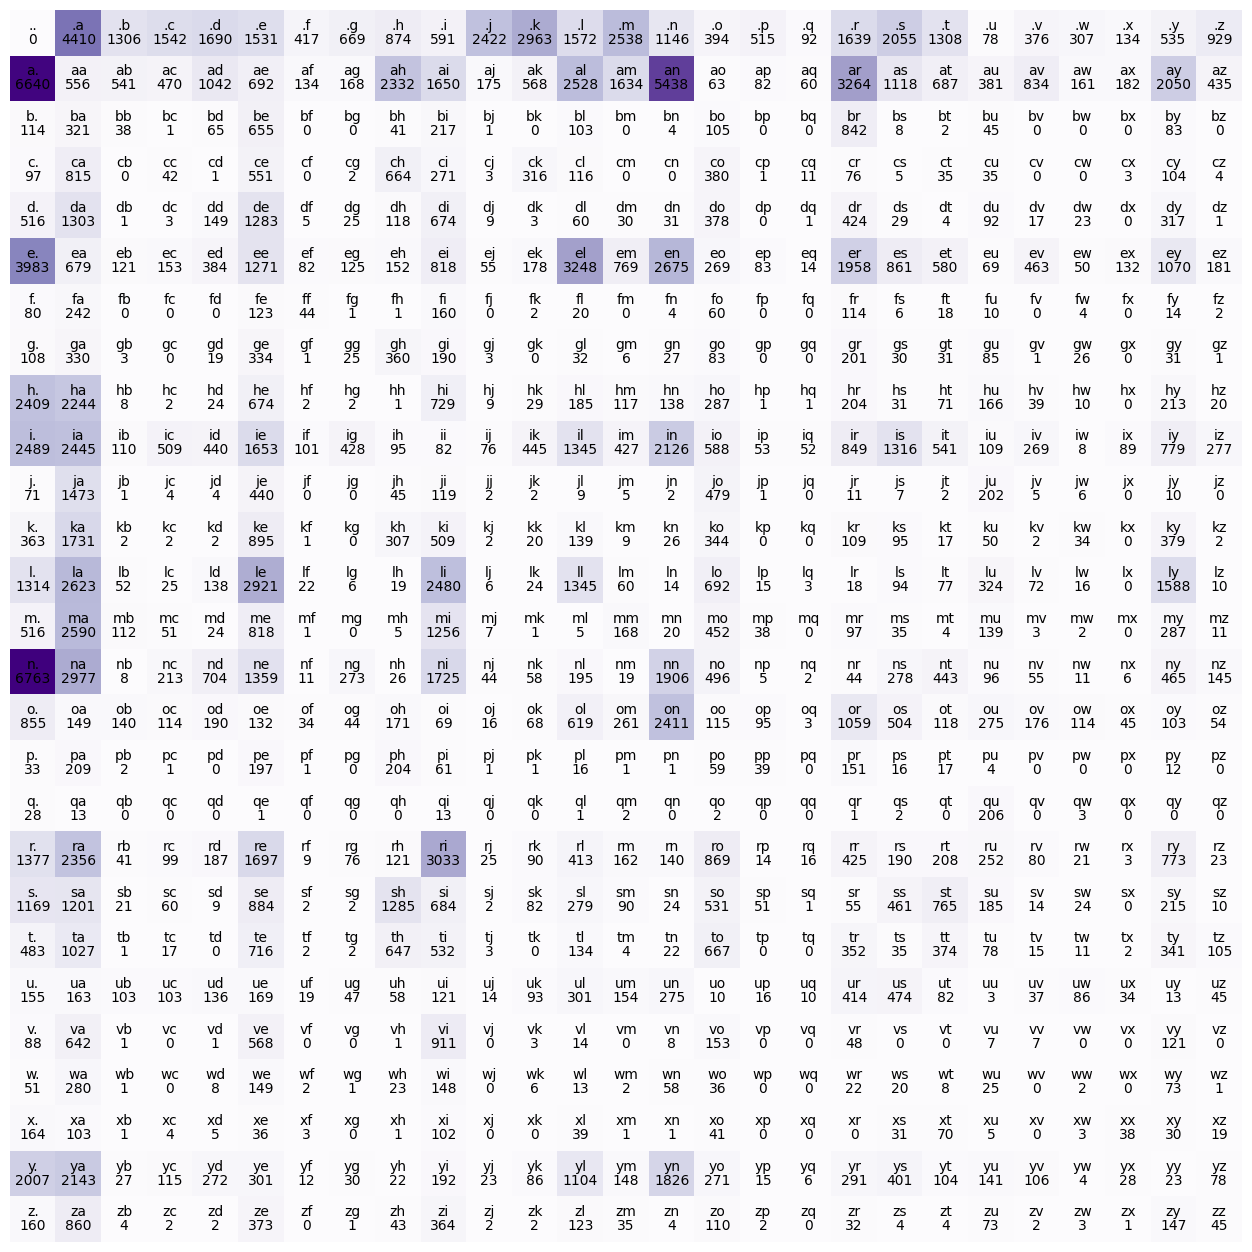

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Purples')
for i in range(N.shape[0]):
  for j in range(N.shape[1]):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='black')
    plt.text(j, i, N[i,j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [68]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [92]:
g = torch.Generator().manual_seed(234124)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'k'

In [344]:
P = (N+1).float() # +1 for model smoothening
P /= P.sum(1, keepdim=True)

In [317]:
for i in range(4):
  out = []
  idx = 0
  while True:
    p = P[idx]
    idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[idx])
    if idx == 0: break
  print("".join(out))

vo.
ven.
a.
migestteria.


In [346]:
# loss function
n = 0
ll = 0.

for w in words:
  w = ['.'] + list(w) + ['.']
  for c1, c2 in zip(w, w[1:]):
    i1, i2 = stoi[c1], stoi[c2]
    prob = P[i1, i2]
    lprob = torch.log(prob)
    ll += lprob
    n += 1

log_likelihood = (ll/n).item()
print(f"{ll.item():.4f}")
print(f"{log_likelihood=:.4f}")
print(f"{-log_likelihood:.4f}")

-559951.5625
log_likelihood=-2.4544
2.4544


In [392]:
# x, y
xs,ys = [],[]

for w in words:
  w = ['.'] + list(w) + ['.']
  for c1, c2 in zip(w, w[1:]):
    i1, i2 = stoi[c1], stoi[c2]
    print(c1, c2)
    xs.append(i1)
    ys.append(i2)
  break

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [393]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
W = torch.randn(27, 27, generator=g)

logits = xenc@W
counts = logits.exp()
probs  = counts/counts.sum(1, keepdim=True)
probs.shape

torch.Size([5, 27])

tensor([ 1, 25, 13, 13, 24])